# W 8-L7: Machine Learning - Regression and Decision Tree: Vehicle Data Price Prediction

# Part 1: Data Understanding and Preprocessing

**1. Importing Data:**

Import the dataset vehicles.csv. Display the first five rows of the dataset.

In [ ]:
import pandas as pd

vehicles_1 = pd.read_csv('Car.csv')

vehicles_1.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500


Check for missing values. If found, describe your approach to handling them.

In [ ]:
missing_values = vehicles_1.isnull().sum()

missing_values[missing_values > 0]

,0


- There are no missing values

**2. Descriptive Statistics:**

○ Use pandas to display a summary of each column (mean, min, max, std, etc.).

In [ ]:
vehicles_1.describe()

,year,mileage,tax,mpg,engineSize,price
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,23362.608761,113.329456,57.906980,1.350807,12279.534844
std,2.050336,19472.054349,62.012456,10.125696,0.432367,4741.343657
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.500000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31060.000000,145.000000,65.700000,1.500000,15299.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


○ Highlight any peculiarities in the data (e.g., missing values, outliers, unusual data ranges).

- Year: Max value of 2060 likely represents a data entry error.
- Mileage: The value of 1 may be an outlier.
- Tax: 0 values may indicate incomplete data.
- Engine Size: A value of 0 could indicate missing or incorrect data.
- Price: A minimum price of 495 could be a potential outlier.

**3. Visualizations:**

○ Plot histograms for mileage, tax, mpg, engineSize, and price.

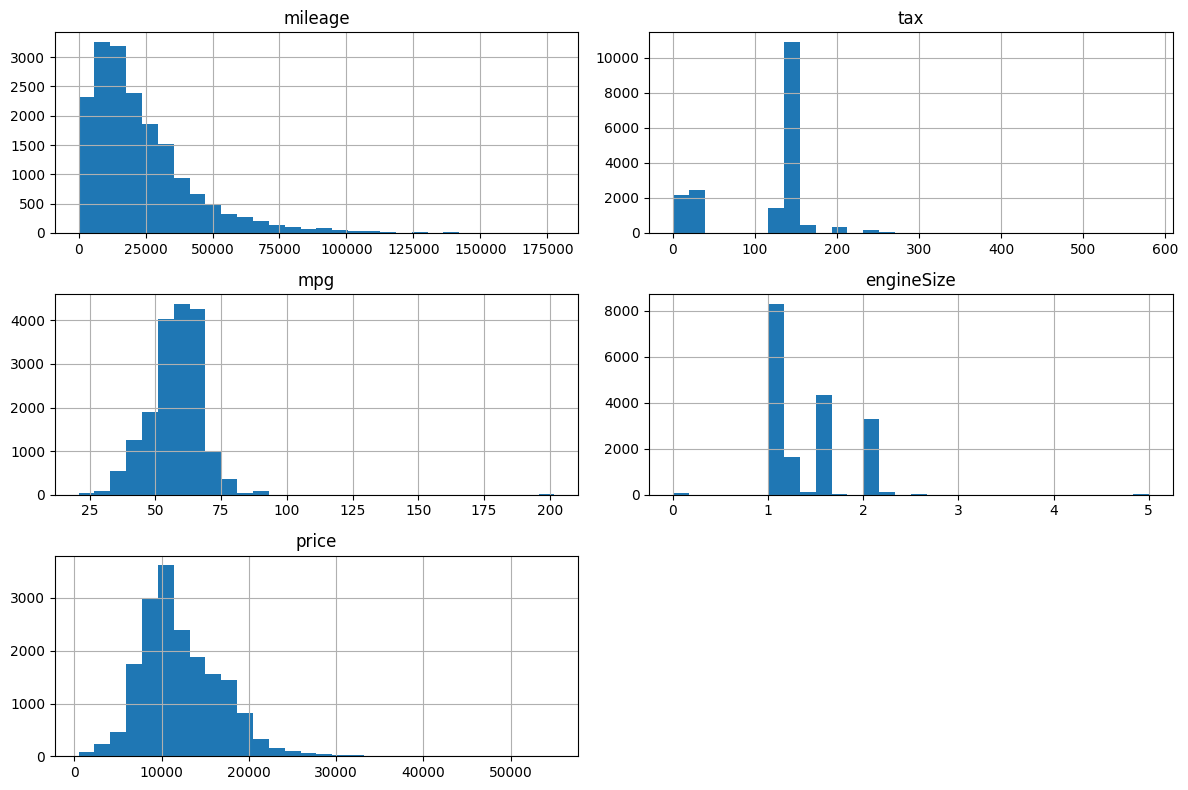

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['mileage', 'tax', 'mpg', 'engineSize', 'price']

vehicles_1[columns_to_plot].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

Comment on the shape and
skewness of the distributions.

- Mileage: Right-skewed with most cars having lower mileage.
- Tax: Bimodal, peaking around 0 and 145, slightly right-skewed.
- MPG: Nearly normal, slightly right-skewed around 50-70 mpg.
- Engine Size: Right-skewed, most vehicles have smaller engines.
- Price: Right-skewed, most cars priced between 5,000 and 20,000.

**4. Data Preprocessing:**

○ Impute or remove any missing values.

- There are no missing values, as provided on the out put of question 1

○ Convert categorical variables (model, transmission, fuelType) into numerical
representations using one-hot encoding or label encoding.

In [ ]:
vehicles_1_onehot = vehicles_1_onehot.astype(int)

vehicles_1_onehot.head()

,year,mileage,tax,mpg,engineSize,price,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,12000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,14000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,13000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,17500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,16500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


○ Standardize the numeric columns (mileage, tax, mpg, engineSize, and price) so that they
have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['mileage', 'tax', 'mpg', 'engineSize', 'price']

scaler = StandardScaler()

vehicles_1_onehot[numeric_cols] = scaler.fit_transform(vehicles_1_onehot[numeric_cols])

vehicles_1_onehot.head()

,year,mileage,tax,mpg,engineSize,price,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,-0.380998,0.591358,-0.042122,-0.447984,-0.058959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,-0.733359,0.591358,-0.042122,-0.447984,0.362875,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,-0.560132,0.591358,-0.042122,-0.447984,0.151958,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,-0.662640,0.510727,-1.721198,-0.447984,1.101082,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,-1.123724,0.510727,-0.931045,-0.447984,0.890166,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Part 2: Regression Models

**Linear Regression**

**1. Multiple Linear Regression:**

○ Build a multiple linear regression model to predict price based on the following
features: mileage, mpg, engineSize, and year.

○ Evaluate the model's performance by calculating the R-squared, RMSE, and Adjusted
R-squared values.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = vehicles_1_onehot[['mileage', 'mpg', 'engineSize', 'year']]
y = vehicles_1_onehot['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.7126799583125507
RMSE: 0.5352225715709632
Adjusted R-squared: 0.7123597353627736


**Polynomial Regression**

 **1. Polynomial Regression:**

○ Build a polynomial regression model to predict price based on mileage. Start with a
degree of 2.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = vehicles_1_onehot[['mileage']]
y = vehicles_1_onehot['price']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

○ Plot the polynomial curve along with the actual data points.

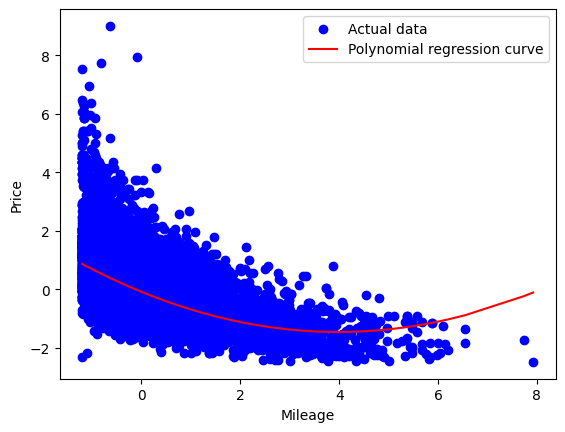

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual data')

X_sorted = np.sort(X, axis=0)

plt.plot(X_sorted, poly_model.predict(poly.fit_transform(X_sorted)), color='red', label='Polynomial regression curve')

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

○ Evaluate and compare the performance using R-squared, RMSE, and Adjusted
R-squared values.

In [ ]:
y_pred = poly_model.predict(X_poly)

r2 = poly_model.score(X_poly, y)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

n = X_poly.shape[0]  # number of observations
p = X_poly.shape[1]  # number of predictors (including polynomial terms)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.30870970882380333
RMSE: 0.8314386875628272
Adjusted R-squared: 0.30859425002892915


**2. Hyperparameter Tuning:**

○ Experiment with different polynomial degrees (e.g., 2, 3, 4).

In [ ]:
for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    y_pred = poly_model.predict(X_poly)

    r2 = poly_model.score(X_poly, y)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    n = X_poly.shape[0]
    p = X_poly.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f'Degree: {degree}')
    print(f'R-squared: {r2}')
    print(f'RMSE: {rmse}')
    print(f'Adjusted R-squared: {adjusted_r2}')
    print('--------------------------------')

Degree: 2
R-squared: 0.30870970882380333
RMSE: 0.8314386875628272
Adjusted R-squared: 0.30859425002892915
--------------------------------
Degree: 3
R-squared: 0.3155540023913247
RMSE: 0.827312515080411
Adjusted R-squared: 0.3154015730171008
--------------------------------
Degree: 4
R-squared: 0.32089613088470825
RMSE: 0.8240775868298396
Adjusted R-squared: 0.3207070707875158
--------------------------------


Which degree yields the best
model performance?

- Degree 2: R-squared: 0.31, RMSE: 0.83
- Degree 3: R-squared: 0.32, RMSE: 0.83
- Degree 4: R-squared: 0.32, RMSE: 0.82
  - The degree of 4 yields the best model performance, with the highest R-squared (0.32), lowest RMSE (0.82), and best Adjusted R-squared (0.32).

# Part 3: Decision Tree Regression

**1. Decision Tree Model:**

○ Build a decision tree regression model to predict price using all available features
(mileage, mpg, engineSize, year, tax, etc.).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = vehicles_1_onehot.drop(columns='price')
y = vehicles_1_onehot['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

○ Display the decision tree structure using any visualization tool (e.g., graphviz or
plot_tree).

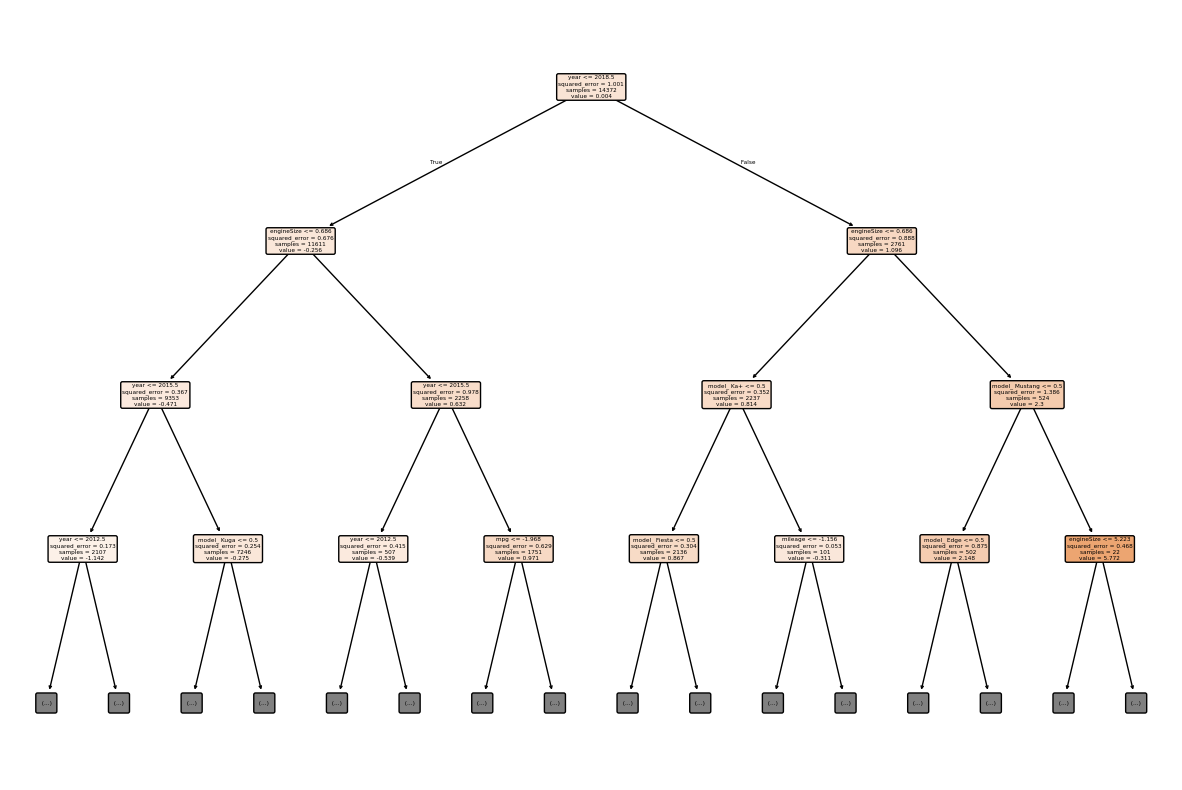

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, max_depth=3)  # Depth is limited as running code took extremely long
plt.show()

# Part 4: Conclusion and Model Evaluation

**1. Model Selection:**

○ Based on the R-squared, RMSE, and Adjusted R-squared values, which model
(multiple linear regression, polynomial regression, or decision tree) provides the most
accurate predictions for car price?

- Multiple Linear Regression provides the best performance, with the highest R-squared (0.71) and the lowest RMSE (0.53), indicating the most accurate predictions for car price.
- Polynomial Regression and Decision Tree Regression do not perform as well based on these metrics, as they result in lower R-squared and higher RMSE values.


**2. Model Limitations:**

○ Discuss any limitations and suggest ways to improve them.

Multiple Linear Regression model, while providing the best performance, has limitations:

- Assumes Linearity: It may not capture non-linear relationships well.

For improvement we can consider polynomial terms or non-linear models if needed.
- Outlier Sensitivity: The model is sensitive to outliers.

For improvement we can use robust regression techniques or remove outliers.
- No Interaction Terms: The model doesn’t account for interactions between features.

For improvement we can add interaction terms to capture more complex relationships.
